In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [0]:
# Import Libraries
import numpy as np
import pandas as pd

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [0]:
campaign_data = pd.read_csv("drive/My Drive/data/bank-additional-full.csv")
campaign_data_validate = pd.read_csv("drive/My Drive/data/bank-additional.csv")

In [0]:
datasets = [campaign_data_validate, campaign_data_validate]

In [189]:
campaign_data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28366,52,admin.,married,high.school,no,no,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,no
10508,42,blue-collar,divorced,high.school,no,no,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
28888,38,admin.,single,high.school,no,yes,no,cellular,apr,fri,...,1,999,2,failure,-1.8,93.075,-47.1,1.405,5099.1,no
9174,53,blue-collar,married,basic.9y,unknown,no,yes,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
27906,28,admin.,single,high.school,no,yes,no,cellular,mar,thu,...,4,999,0,nonexistent,-1.8,92.843,-50.0,1.538,5099.1,no


In [190]:
campaign_data_validate.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
571,33,blue-collar,married,basic.9y,no,no,yes,telephone,jul,mon,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.827,4991.6,no
3311,48,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
3560,39,housemaid,married,basic.9y,no,yes,yes,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
2480,33,admin.,single,university.degree,no,yes,no,telephone,oct,thu,...,3,6,2,success,-3.4,92.431,-26.9,0.740,5017.5,yes
3300,51,housemaid,married,basic.4y,unknown,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [191]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [192]:
campaign_data_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [193]:
campaign_data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [194]:
campaign_data_validate.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [0]:
for dataset in datasets:
  for col in dataset.columns:
    dataset[col] = dataset[col].replace('unknown', np.NAN)

In [196]:
campaign_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [197]:
percent_null_campaign_data= (campaign_data.isnull().sum()/ len(campaign_data)) * 100
percent_null_campaign_data

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [198]:
campaign_data_validate.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [199]:
percent_null_campaign_data_validate= (campaign_data_validate.isnull().sum()/ len(campaign_data_validate)) * 100
percent_null_campaign_data_validate

age                0.000000
job                0.946832
marital            0.267055
education          4.054382
default           19.495023
housing            2.549162
loan               2.549162
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

**Handling missing values!**

In [200]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in datasets:    
    
    #complete job with mode
    dataset['job'].fillna(dataset['job'].mode()[0], inplace = True)
    
    #complete marital with mode
    dataset['marital'].fillna(dataset['marital'].mode()[0], inplace = True)
    
    #complete education with mode
    dataset['education'].fillna(dataset['education'].mode()[0], inplace = True)
    
    #complete default with mode
    dataset['default'].fillna(dataset['default'].mode()[0], inplace = True)
    
    #complete housing with mode
    dataset['housing'].fillna(dataset['housing'].mode()[0], inplace = True)
    
    #complete loan with mode
    dataset['loan'].fillna(dataset['loan'].mode()[0], inplace = True)
    
print(campaign_data.isnull().sum())
print("-"*10)
print(campaign_data_validate.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
----------
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Creating Feature**

In [201]:
campaign_data_validate['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [202]:
campaign_data_validate['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

In [0]:
salaried_jobs = ['blue-collar', 'services', 'admin.', 'entrepreneur',
                 'self-employed', 'technician', 'management']
high_education = ['high.school', 'university.degree',
                  'professional.course' ]

for dataset in datasets:
    dataset['IsSalaried'] = dataset['job']
    dataset['IsSalaried'] = dataset['IsSalaried'].replace(['blue-collar', 
                                    'services', 'admin.', 'entrepreneur','self-employed', 'technician', 'management'], 1)
    dataset['IsSalaried'] = dataset['IsSalaried'].replace(['student', 'retired', 'housemaid.', 'unemployed'] , 0)

for dataset in datasets:
    dataset['Education_Level'] = dataset['education']
    dataset['Education_Level'] = dataset['Education_Level'].replace(['high.school', 'university.degree',
                  'professional.course'], 1)
    dataset['Education_Level'] = dataset['IsSalaried'].replace(['basic.9y', 
                  'basic.6y', 'basic.4y', 'illiterate'], 0)

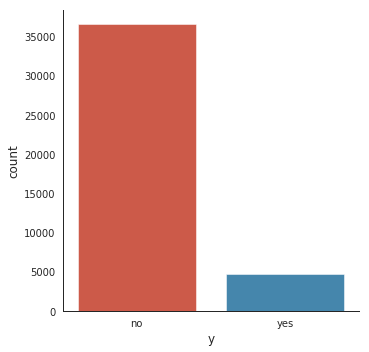

In [206]:
# To check Data Imbalance
sns.catplot('y',data=campaign_data,kind="count")

In [0]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(y_test, y_pred):
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

Confusion matrix:
 [[3 1]
 [3 2]]


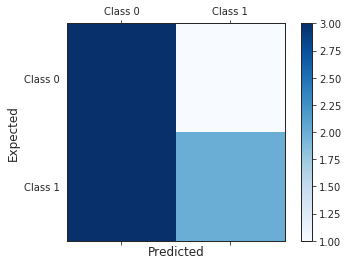

In [208]:
y_test = [1,0,1,0,1,0,1,0,1]
y_pred = [1,0,0,0,0,0,1,1,0]
plot_confusion_matrix(y_test, y_pred)

In [0]:
from sklearn import metrics
def dispaly_model_parameters(y_test, y_pred):
        print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
        print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
        print("Precision: ",metrics.precision_score(y_test, y_pred))
        print("Recall: ",metrics.recall_score(y_test, y_pred))
        print("f1 score: ",metrics.f1_score(y_test, y_pred))
        print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))
        print("classification_report: \n",metrics.classification_report(y_test, y_pred))
        print(pd.crosstab(y_test, y_pred))

In [210]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[3 1]
 [3 2]]
Accuracy:  0.5555555555555556
Precision:  0.6666666666666666
Recall:  0.4
f1 score:  0.5
roc_auc_score:  0.575
classification_report: 
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.67      0.40      0.50         5

   micro avg       0.56      0.56      0.56         9
   macro avg       0.58      0.57      0.55         9
weighted avg       0.59      0.56      0.54         9



ValueError: ignored

In [0]:
def plot_roc_curve(y_test, probs):
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
plot_roc_curve(y_test, y_pred)

In [0]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

resampling_model = [RandomUnderSampler, ClusterCentroids, TomekLinks, RandomOverSampler, SMOTE]

def resampling_method(model, X_train, y_train):
  model_obj = model(random_state = 0)
  X_sample, y_sample = model_obj.fit_sample(X_train, y_train)
  return X_sample, y_sample
  

from imblearn.under_sampling import RandomUnderSampler
  rus = RandomUnderSampler(random_state = 0)
  X_sample2, y_sample2 = rus.fit_sample(X_train, y_train)
  
  from imblearn.under_sampling import ClusterCentroids
  cc = ClusterCentroids(random_state = 0)
  X_sample3, y_sample3 = cc.fit_sample(X_train, y_train)
  
  from imblearn.under_sampling import TomekLinks
  tl = TomekLinks(random_state = 0 )
  X_sample4, y_sample4 = tl.fit_sample(X_train, y_train)
  
  from imblearn.over_sampling import RandomOverSampler
  ros = RandomOverSampler(random_state = 0)
  X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
  
  from imblearn.over_sampling import SMOTE
  smote = SMOTE(random_state = 0)
  X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)